In [3]:
#imports

import numpy as np
import matplotlib.pyplot as plt
import cv2

# Enable inline plotting
%matplotlib inline


In [4]:
# Read and display the original image

im_path = "bill.jpeg"
img = cv2.imread(im_path)
print("Original image shape:", img.shape)

Original image shape: (1066, 800, 3)


Resized image shape: (800, 1000, 3)


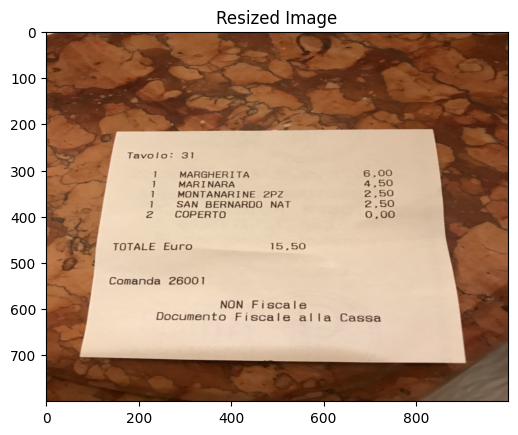

In [6]:
# Resize the image for easier processing and display

img = cv2.resize(img, (1000, 800))
print("Resized image shape:", img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
plt.title("Resized Image")
plt.show()


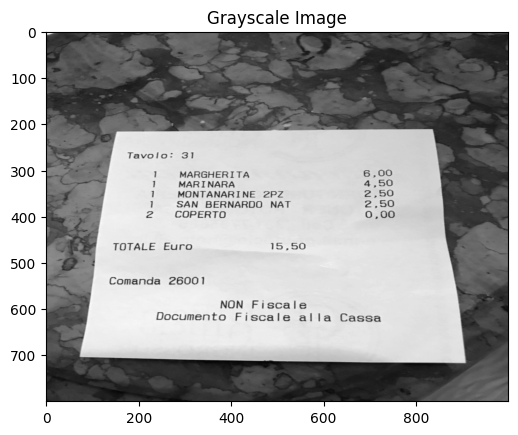

In [7]:
# Convert the image to grayscale and display it

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale Image")
plt.show()

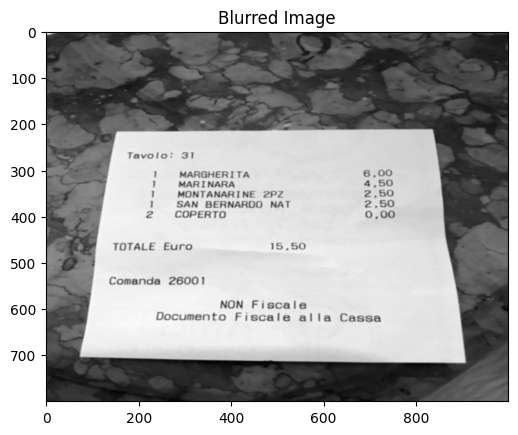

In [8]:
# Apply Gaussian Blur to the grayscale image to reduce noise

blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blurred, cmap="gray")
plt.title("Blurred Image")
plt.show()

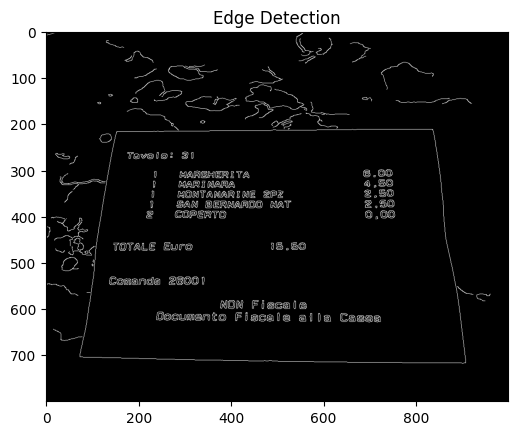

In [9]:
# Perform edge detection using the Canny algorithm and display the result

edge = cv2.Canny(blurred, 50, 150)  # Adjust thresholds as needed
plt.imshow(edge, cmap="gray")
plt.title("Edge Detection")
plt.show()

In [10]:
# Extract contours from the edge-detected image

contours, _ = cv2.findContours(edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(f"Number of contours found: {len(contours)}")

# Sort contours by area in descending order

contours = sorted(contours, key=cv2.contourArea, reverse=True)
print(f"Number of contours after sorting: {len(contours)}")

Number of contours found: 498
Number of contours after sorting: 498


In [11]:
# Select the largest contour that approximates to a quadrilateral

for c in contours:
    p = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.01 * p, True)
    if len(approx) == 4:
        target = approx
        break



In [12]:
# Check if a suitable contour was found

if target is not None:
    print(f"Target contour shape: {target.shape}")
else:
    print("No suitable contour found")


Target contour shape: (4, 1, 2)


In [13]:
# Function to reorder the contour points

def reorder(h):
    h = h.reshape((4, 2))
    hnew = np.zeros((4, 2), dtype=np.float32)

    add = h.sum(axis=1)
    hnew[0] = h[np.argmin(add)]
    hnew[2] = h[np.argmax(add)]

    diff = np.diff(h, axis=1)
    hnew[1] = h[np.argmin(diff)]
    hnew[3] = h[np.argmax(diff)]

    return hnew

Reordered points: [[153. 217.]
 [837. 213.]
 [908. 717.]
 [ 73. 704.]]


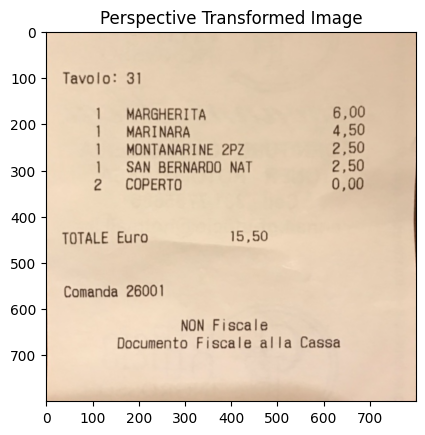

In [14]:
# Reorder the contour points for perspective transformation

if target is not None:
    target_reordered = reorder(target)
    print(f"Reordered points: {target_reordered}")

    # Perform perspective transformation

    input_representation = target_reordered.astype(np.float32)
    output_map = np.float32([[0, 0], [800, 0], [800, 800], [0, 800]])

    M = cv2.getPerspectiveTransform(input_representation, output_map)
    ans = cv2.warpPerspective(img, M, (800, 800))
    plt.imshow(cv2.cvtColor(ans, cv2.COLOR_BGR2RGB))
    plt.title("Perspective Transformed Image")
    plt.show()
else:
    ans = None
    print("Perspective transformation not applied due to missing contour")

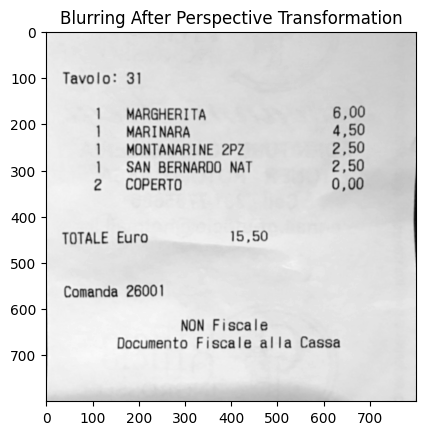

In [15]:
# Convert the perspective-transformed image to grayscale

if ans is not None:
    res = cv2.cvtColor(ans, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to the transformed image

    b_res = cv2.GaussianBlur(res, (3, 3), 0)

    # Display the blurred transformed image

    plt.imshow(b_res, cmap='gray')
    plt.title("Blurring After Perspective Transformation")
    plt.show()
else:
    print("Skipping grayscale and blur steps due to missing transformed image")